# AVM Analysis




In [24]:
# -------------------------------------------------------------------
# Setup cell — place this at the top of every analysis notebook
# -------------------------------------------------------------------
# Core libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.graphics.mosaicplot import mosaic

df = pd.read_csv("../datasets/customer_shopping_data_v5.csv")
sns.set_theme(style="whitegrid")

color1 = '#FF9E9D'  # Coral Pink
color2 = '#FFC785'  # Peach
color3 = '#FFF59D'  # Light Lemon
color4 = '#A0E6A6'  # Mint Green
color5 = '#87C8FF'  # Sky Blue
color6 = '#C4A2FF'  # Lavender

1. shopping_mall ↔ total_spend <br>
Which shopping mall generates the highest revenue?

2. shopping_mall ↔ avg_basket_value <br>
Does the average basket value differ across shopping malls?

3. shopping_mall ↔ transaction_count <br>
Traffic volume by shopping mall

4. shopping_mall ↔ season <br>
Seasonal variation in shopping mall performance

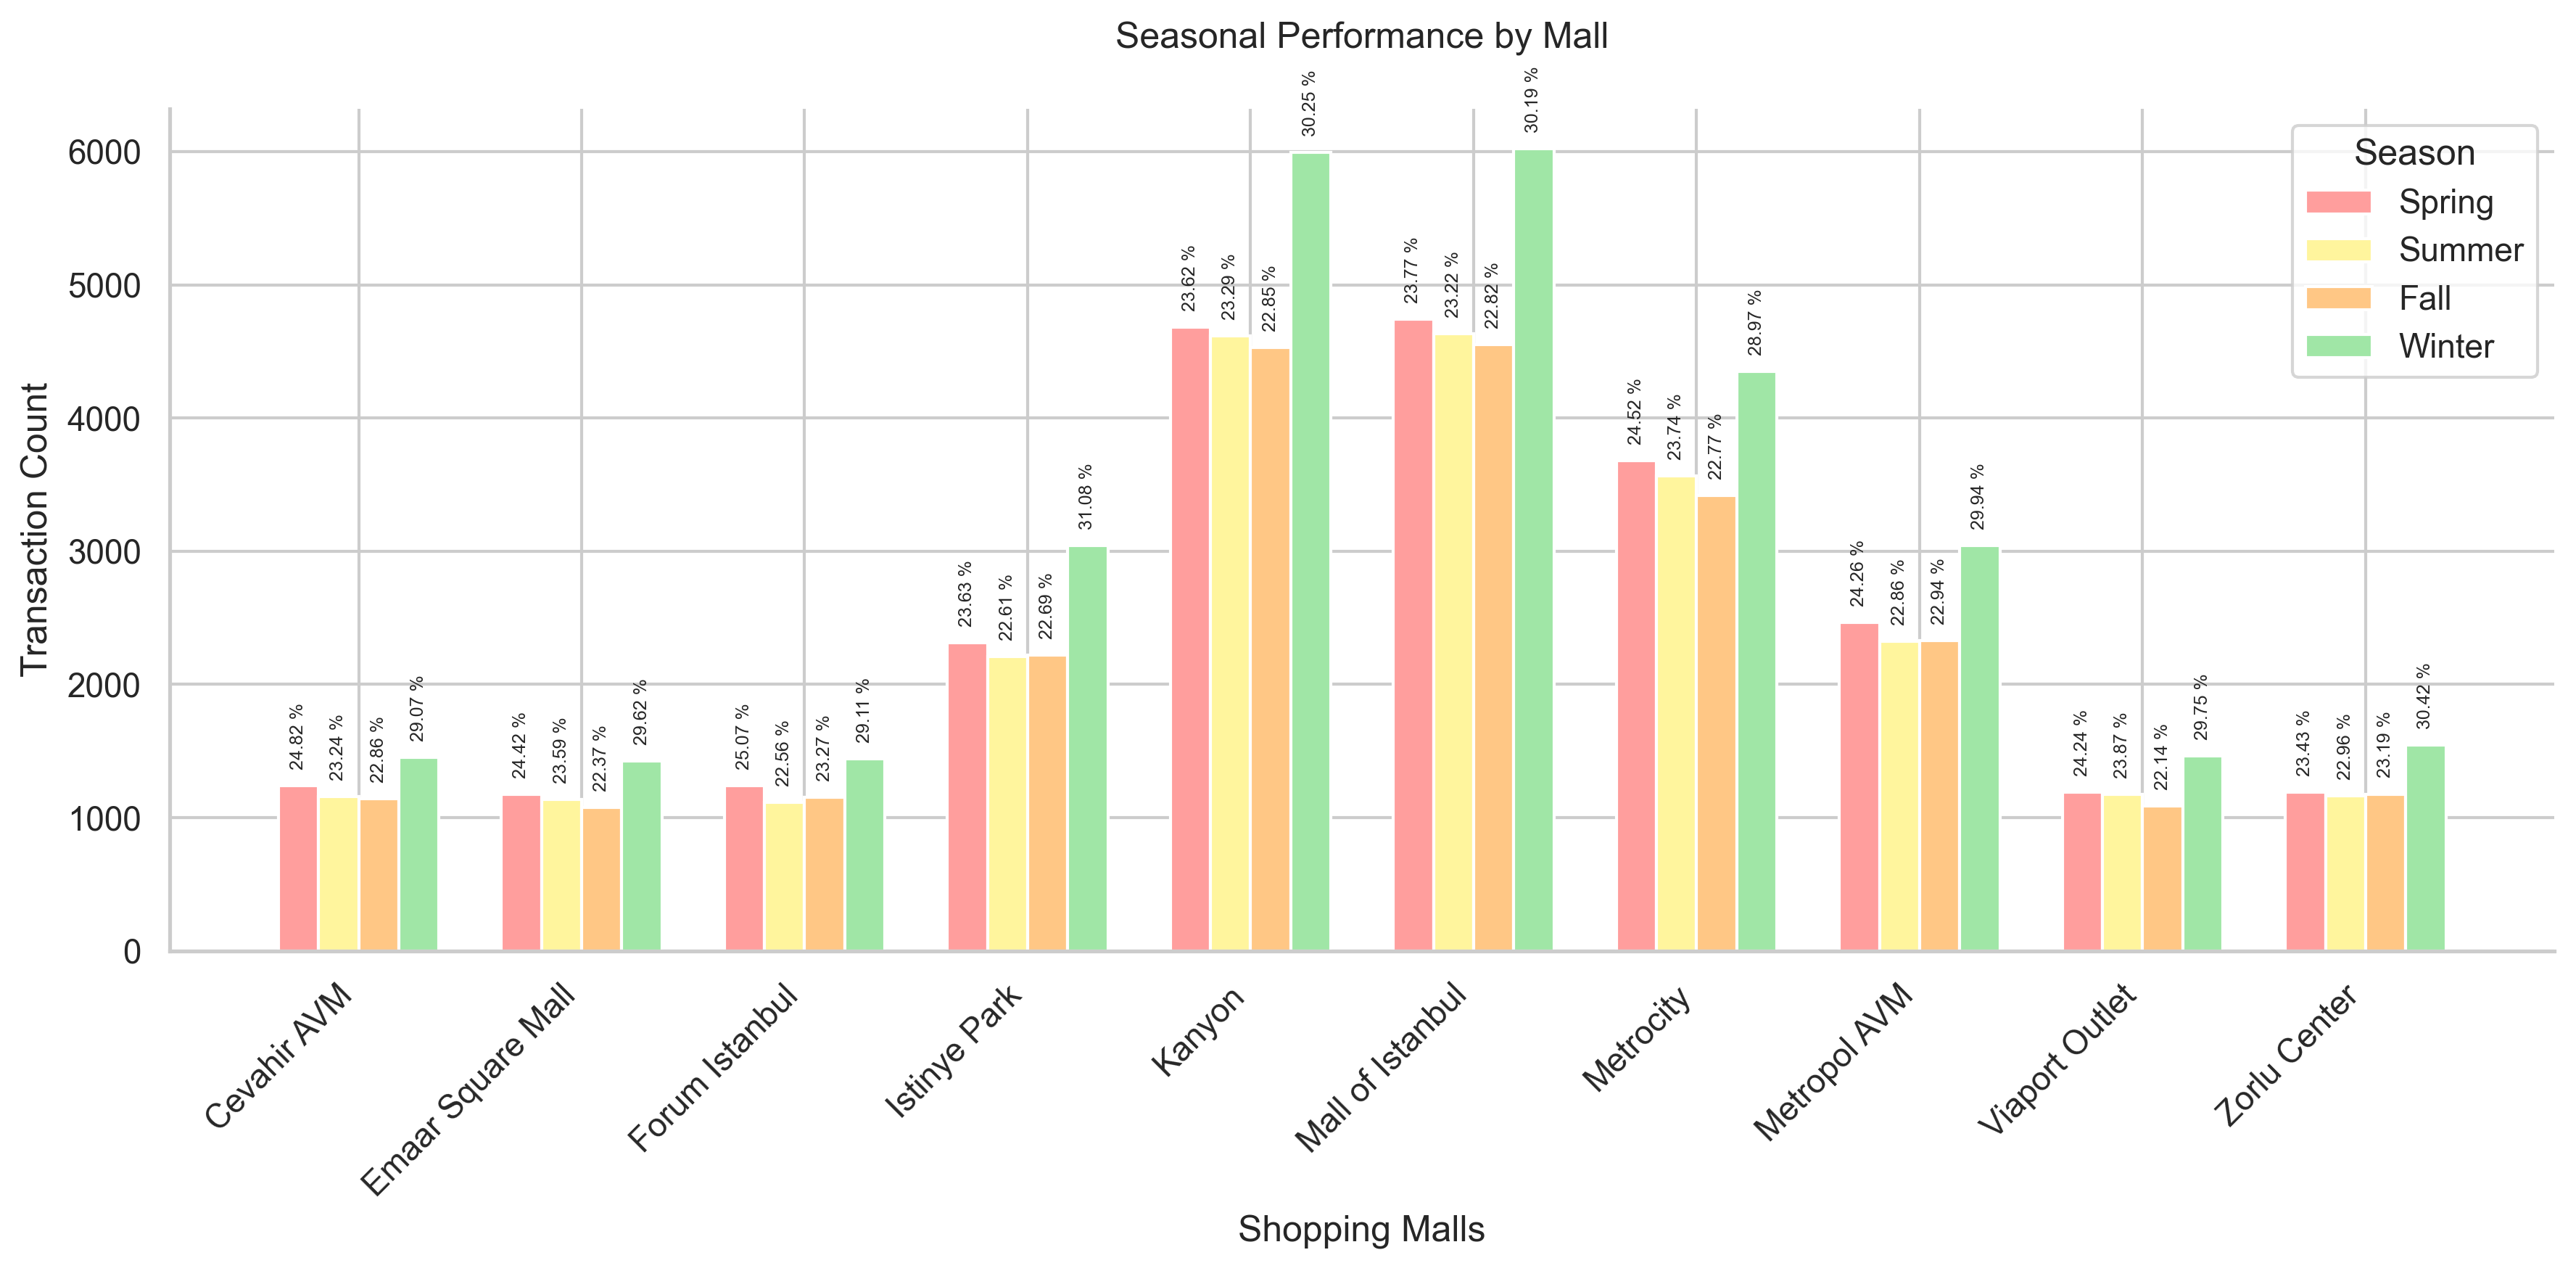


Observed counts:
 season             Fall  Spring  Summer  Winter
shopping_mall                                  
Cevahir AVM        1141    1239    1160    1451
Emaar Square Mall  1076    1175    1135    1425
Forum Istanbul     1151    1240    1116    1440
Istinye Park       2219    2311    2211    3040
Kanyon             4529    4682    4616    5996
Mall of Istanbul   4550    4741    4631    6021
Metrocity          3418    3681    3563    4349
Metropol AVM       2331    2465    2323    3042
Viaport Outlet     1088    1191    1173    1462
Zorlu Center       1177    1189    1165    1544

Expected counts under H0:
                     Spring   Summer     Fall   Winter
Cevahir AVM        1138.14  1200.06  1158.86  1493.93
Emaar Square Mall  1097.09  1156.78  1117.07  1440.05
Forum Istanbul     1128.11  1189.48  1148.65  1480.76
Istinye Park       2230.44  2351.80  2271.06  2927.70
Kanyon             4520.40  4766.35  4602.72  5933.53
Mall of Istanbul   4547.77  4795.21  4630.58  5969.45

In [25]:
# ╔══════════════════════════════════════════════════════════════╗
# ║ ANALYSIS 4: Seasonal variation in shopping-mall performance  ║
# ╚══════════════════════════════════════════════════════════════╝
ct = pd.crosstab(df["shopping_mall"], df["season"])  # rows=mall, cols=season
malls   = ct.index.tolist()
seasons = ["Spring", "Summer", "Fall", "Winter"]
x       = np.arange(len(malls))
width   = 0.18
season_colors = {"Spring": color1, "Summer": color3,
                 "Fall":  color2, "Winter": color4}

fig, ax = plt.subplots(figsize=(12,6), dpi=300)
for i, s in enumerate(seasons):
    counts = ct[s].values
    barpos = x + (i - 1.5)*width
    ax.bar(barpos, counts, width=width,
           color=season_colors[s], label=s)
    pct = (counts / ct.sum(axis=1).values) * 100
    for j, (c, p) in enumerate(zip(counts, pct)):
        ax.text(
            barpos[j],
            c + max(ct.values.max() * 0.02, 1),
            f"{p:.2f} %",
            ha="center",
            va="bottom",
            fontsize=6, 
            rotation=90 
        )


ax.set_xticks(x); ax.set_xticklabels(malls, rotation=45, ha="right")
ax.set_xlabel("Shopping Malls")
ax.set_ylabel("Transaction Count")
ax.set_title("Seasonal Performance by Mall", pad=20)
ax.legend(title="Season")
sns.despine()
plt.tight_layout()
plt.savefig("dataset_mall_analysis_figures/shopping_mall_category_4.png", dpi=300)
plt.show()

chi2,p,dof,expected = stats.chi2_contingency(ct)
print("\nObserved counts:\n", ct)
print("\nExpected counts under H0:\n", pd.DataFrame(expected, index=malls, columns=seasons).round(2))
print(f"\nχ² = {chi2:.4f}  (df={dof})   p-value = {p:.4f}")
print("At the 95 % confidence level, mall performance **varies by season**." if p<0.05
      else "At the 95 % confidence level, no significant seasonal effect on mall performance.")


5. shopping_mall ↔ day‑of‑week <br>
Daily traffic patterns across shopping malls

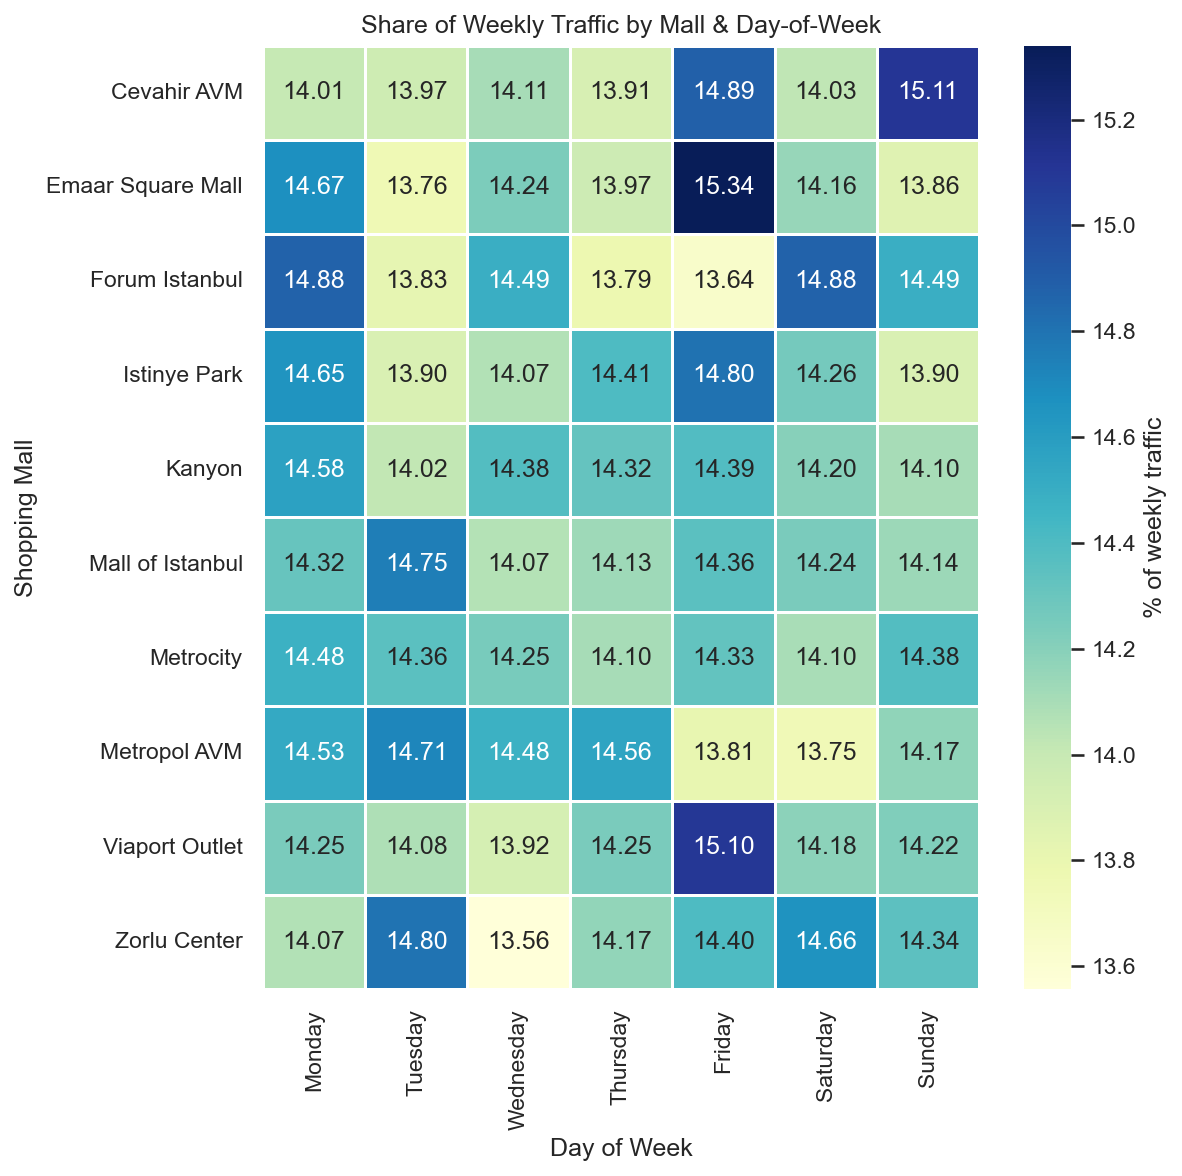


Observed counts:
 weekday            Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  \
shopping_mall                                                               
Cevahir AVM           699      697        704       694     743       700   
Emaar Square Mall     706      662        685       672     738       681   
Forum Istanbul        736      684        717       682     675       736   
Istinye Park         1433     1360       1376      1409    1448      1395   
Kanyon               2890     2779       2851      2839    2853      2815   
Mall of Istanbul     2855     2942       2805      2818    2863      2840   
Metrocity            2174     2155       2139      2117    2151      2116   
Metropol AVM         1476     1495       1471      1479    1403      1397   
Viaport Outlet        700      692        684       700     742       697   
Zorlu Center          714      751        688       719     731       744   

weekday            Sunday  
shopping_mall              


In [26]:
df["invoice_date"] = pd.to_datetime(df["invoice_date"], errors="coerce")
df["weekday"] = df["invoice_date"].dt.day_name()

ct = pd.crosstab(df["shopping_mall"], df["weekday"]).reindex(
    columns=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)

heatmap_data = ct / ct.sum(axis=1).values[:,None] * 100  # % share

plt.figure(figsize=(8,8), dpi=150)
sns.heatmap(heatmap_data, annot=True, fmt=".2f",
            cmap="YlGnBu", linewidths=0.5, cbar_kws={"label":"% of weekly traffic"})
plt.title("Share of Weekly Traffic by Mall & Day-of-Week (Heatmap)")
plt.ylabel("Shopping Mall")
plt.xlabel("Day of Week")
plt.tight_layout()
plt.savefig("dataset_mall_analysis_figures/shopping_mall_day_of_week_5.png", dpi=150)
plt.show()

chi2, p, dof, expected = stats.chi2_contingency(ct)
print("\nObserved counts:\n", ct)
print("\nExpected counts under H0:\n", pd.DataFrame(expected, index=ct.index, columns=ct.columns).round(2))
print(f"\nχ² = {chi2:.4f}  (df={dof})   p-value = {p:.4f}")
print("At the 95 % confidence level, traffic pattern **differs across days** for different malls." if p < 0.05
      else "At the 95 % confidence level, no significant day-of-week effect on mall traffic distribution.")


6. shopping_mall ↔ Econ_Conf_level <br>
Which shopping mall is more resilient when consumer confidence declines?


7. shopping_mall ↔ category <br>
Which product categories are preferred at which shopping malls?

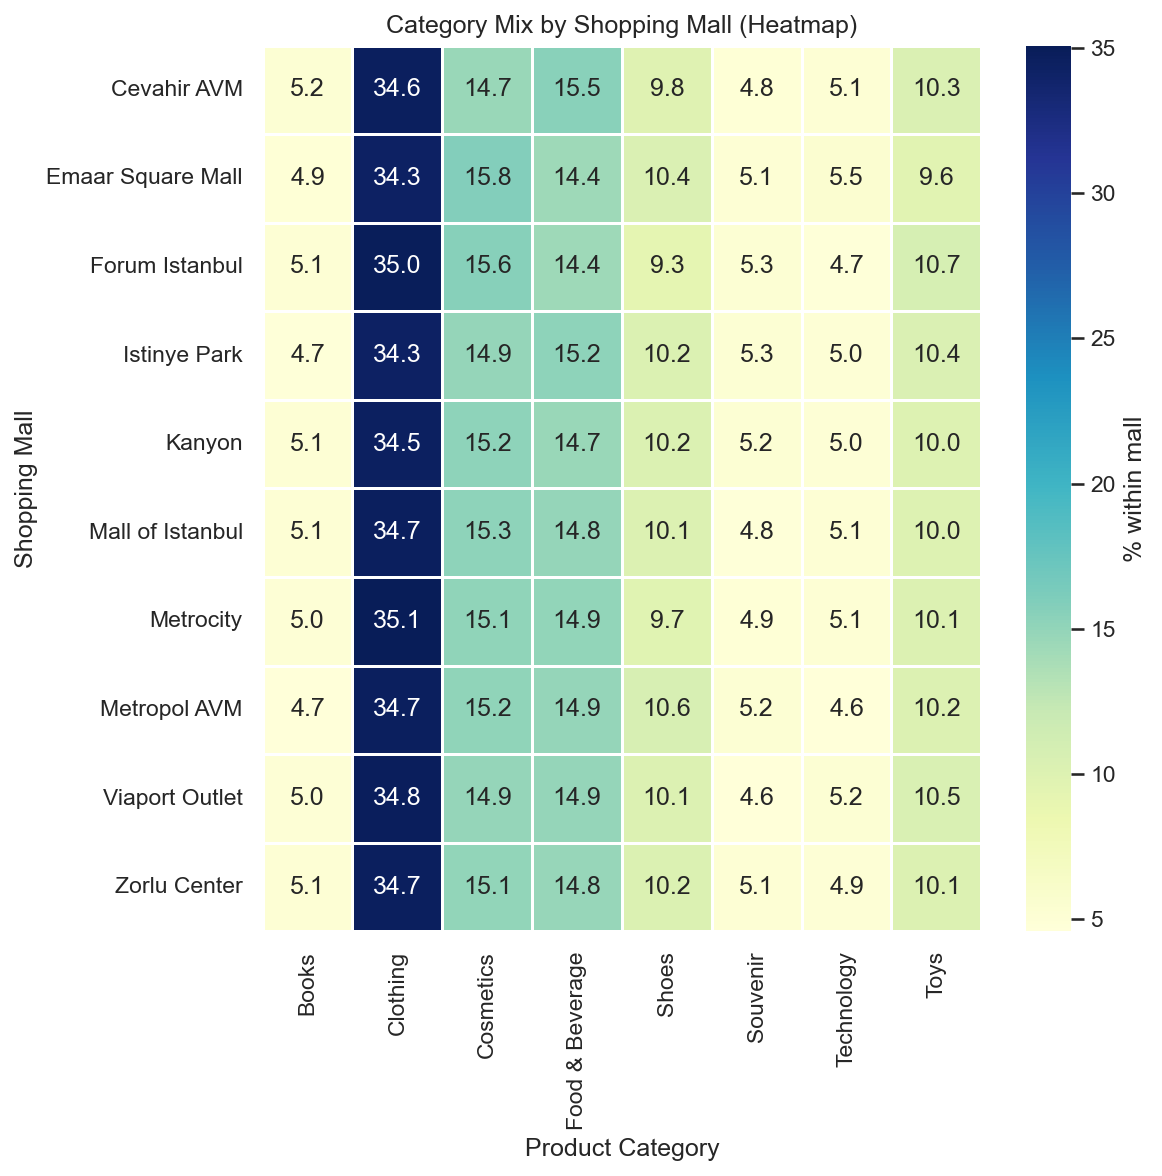


Observed counts:
 category           Books  Clothing  Cosmetics  Food & Beverage  Shoes  \
shopping_mall                                                           
Cevahir AVM          258      1729        732              772    490   
Emaar Square Mall    236      1651        760              692    498   
Forum Istanbul       252      1729        770              712    458   
Istinye Park         462      3353       1458             1490   1001   
Kanyon              1013      6840       3023             2909   2017   
Mall of Istanbul    1025      6923       3050             2957   2023   
Metrocity            752      5268       2265             2244   1457   
Metropol AVM         476      3525       1541             1517   1074   
Viaport Outlet       246      1708        734              733    497   
Zorlu Center         261      1761        764              750    519   

category           Souvenir  Technology  Toys  
shopping_mall                                  
Cevahir 

In [27]:
# Cross-tabulation & % share
ct = pd.crosstab(df["shopping_mall"], df["category"])
prop = ct.divide(ct.sum(axis=1), axis=0) * 100  # % within mall

# Heatmap
plt.figure(figsize=(8,8), dpi=150)
sns.heatmap(prop, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5, cbar_kws={"label": "% within mall"})
plt.title("Category Mix by Shopping Mall (Heatmap)")
plt.ylabel("Shopping Mall"); plt.xlabel("Product Category")
plt.tight_layout() 
plt.savefig("dataset_mall_analysis_figures/shopping_mall_category_7.png", dpi=150)
plt.show()

# Chi-squared test
chi2, p, dof, expected = stats.chi2_contingency(ct)
print("\nObserved counts:\n", ct)
print("\nExpected counts under H0:\n", pd.DataFrame(expected, index=ct.index, columns=ct.columns).round(2))
print(f"\nχ² = {chi2:.4f}  (df={dof})   p-value = {p:.4f}")
print("At the 95 % confidence level, category preference **differs by mall**." if p<0.05
      else "At the 95 % confidence level, no significant association between mall and category preference.")
